## Data Download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#
import zipfile

def extract_zip_archive(zip_path, output_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)


zip_path = '/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/data/train_padding_224by224.zip'
output_dir = '/content/data/train/'
extract_zip_archive(zip_path, output_dir)

zip_path = '/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/data/test_padding_224by224.zip'
output_dir = '/content/data/test/'
extract_zip_archive(zip_path, output_dir)


## 데이터 다운로드

In [ ]:
cd /content

/content


In [ ]:
import urllib
import time
import os


# 학습 데이터 다운로드 (1분 56초)

start = time.time()
url = 'https://share.aiconnect.kr/fake_or_real/trainFile/train.zip'
if not os.path.exists('train.zip'):
    urllib.request.urlretrieve(url, 'train.zip')
print('train time : ', time.strftime('%M:%S', time.gmtime(time.time() - start)))

train time :  01:55


In [ ]:
# 평가용 데이터 다운로드 (4분)

start = time.time()
url = 'https://share.aiconnect.kr/fake_or_real/testFile/test.zip'
if not os.path.exists('test.zip'):
    urllib.request.urlretrieve(url, 'test.zip')
print('test time : ', time.strftime('%M:%S', time.gmtime(time.time() - start)))

test time :  03:37


## 데이터 압축풀기

In [ ]:
import zipfile

zip_file_train = "train.zip"
output_folder_train = "data/"
start = time.time()
# Zip 파일 열기
with zipfile.ZipFile(zip_file_train, 'r') as zip_ref:
    # 모든 파일 압축 해제
    zip_ref.extractall(output_folder_train)
print('train time : ', time.strftime('%M:%S', time.gmtime(time.time() - start)))

os.remove(zip_file_train)

train time :  02:10


In [ ]:
zip_file_test = "test.zip"
output_folder_test = "data/"
start = time.time()
# Zip 파일 열기
with zipfile.ZipFile(zip_file_test, 'r') as zip_ref:
    # 모든 파일 압축 해제
    zip_ref.extractall(output_folder_test)
print('test time : ', time.strftime('%M:%S', time.gmtime(time.time() - start)))

os.remove(zip_file_test)

test time :  03:07


## EDA

In [ ]:
import pandas as pd

# CSV 파일 경로 설정

# CSV 파일 읽어오기
ptF_1ep_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/effnet0_1ep_preF_20230630_165724/prdict_train.csv')
ptF_1ep_df = ptF_1ep_df.rename(columns={'predict': 'ptF_1ep'})
ptF_1ep_data50_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/effnet0_1ep_preF_data50_20230630_170017/prdict_train.csv')
ptF_1ep_data50_df = ptF_1ep_data50_df.rename(columns={'predict': 'ptF_1ep_data50'})
ptT_1ep_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/effnet0_1ep_preT_20230630_170612/prdict_train.csv')
ptT_1ep_df = ptT_1ep_df.rename(columns={'predict': 'ptT_1ep'})
ptT_1ep_data50_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/effnet0_1ep_preT_data50_20230630_170829/prdict_train.csv')
ptT_1ep_data50_df = ptT_1ep_data50_df.rename(columns={'predict': 'ptT_1ep_data50'})
ptT_20ep_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/pretrainedT_20ep_20230630_172346/prdict_train.csv')
ptT_20ep_df = ptT_20ep_df.rename(columns={'predict': 'ptT_20ep'})
ptT_20ep_data10_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/pretrainedT_20ep_data10_20230630_172623/prdict_train.csv')
ptT_20ep_data10_df = ptT_20ep_data10_df.rename(columns={'predict': 'ptT_20ep_data10'})
ptT_20ep_data50_df = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/pretrainedT_20ep_data50_20230630_141411/prdict_train.csv')
ptT_20ep_data50_df = ptT_20ep_data50_df.rename(columns={'predict': 'ptT_20ep_data50'})


In [ ]:
df_all = pd.merge(ptF_1ep_df, ptF_1ep_data50_df, on=['file_path','label'],how='outer')
df_all = pd.merge(df_all, ptT_1ep_df, on=['file_path','label'],how='outer')
df_all = pd.merge(df_all, ptT_1ep_data50_df, on=['file_path','label'],how='outer')
df_all = pd.merge(df_all, ptT_20ep_df, on=['file_path','label'],how='outer')
df_all = pd.merge(df_all, ptT_20ep_data10_df, on=['file_path','label'],how='outer')
df_all = pd.merge(df_all, ptT_20ep_data50_df, on=['file_path','label'],how='outer')

df_all

,file_path,label,ptF_1ep,ptF_1ep_data50,ptT_1ep,ptT_1ep_data50,ptT_20ep,ptT_20ep_data10,ptT_20ep_data50
0,/content/data/train/real_images/real_05900.png,0,0,0,0,0,0,0,0
1,/content/data/train/fake_images/fake_07533.png,1,1,1,1,1,1,1,1
2,/content/data/train/fake_images/fake_05340.png,1,1,0,1,1,1,1,1
3,/content/data/train/fake_images/fake_02580.png,1,1,1,1,1,1,1,1
4,/content/data/train/real_images/real_07861.png,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5995,/content/data/train/fake_images/fake_07909.png,1,1,1,1,1,1,1,1
5996,/content/data/train/real_images/real_07215.png,0,0,0,0,0,0,0,0
5997,/content/data/train/real_images/real_03884.png,0,0,0,0,0,0,0,0
5998,/content/data/train/real_images/real_02422.png,0,0,1,0,0,0,0,0


In [ ]:
# label들을 더하기
df_all['count']= df_all.apply(lambda x : sum(x[1:]),axis=1)
# label들 더한 값이 8또는 0인가
df_all = df_all[(df_all['count'] != 8) & (df_all['count'] != 0)]
df_all

,file_path,label,ptF_1ep,ptF_1ep_data50,ptT_1ep,ptT_1ep_data50,ptT_20ep,ptT_20ep_data10,ptT_20ep_data50,count
2,/content/data/train/fake_images/fake_05340.png,1,1,0,1,1,1,1,1,7
4,/content/data/train/real_images/real_07861.png,0,1,0,0,0,0,0,0,1
15,/content/data/train/fake_images/fake_08981.png,1,1,0,1,0,1,0,1,5
17,/content/data/train/real_images/real_09891.png,0,1,0,0,0,0,0,0,1
18,/content/data/train/fake_images/fake_00989.png,1,1,0,1,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...
5980,/content/data/train/real_images/real_05152.png,0,1,0,0,0,0,0,0,1
5982,/content/data/train/real_images/real_07207.png,0,1,0,0,0,0,0,0,1
5985,/content/data/train/real_images/real_04976.png,0,1,1,0,0,0,0,1,3
5990,/content/data/train/fake_images/fake_08354.png,1,1,1,1,1,1,0,1,7


In [ ]:
print(f'\t\t Fake / Real')
for i, col in enumerate(df_all.columns):
  if i < 2 :
    continue
  if col.find('data') != -1 :
    continue
  print(f"{col} : \t{len(df_all[ (df_all['label'] == 1 ) & (df_all['label'] != df_all[col]) ]) } / {len(df_all[ (df_all['label'] == 0 ) & (df_all['label'] != df_all[col]) ]) }")


		 Fake / Real
ptF_1ep : 	381 / 467
ptT_1ep : 	113 / 49
ptT_20ep : 	8 / 11
count : 	933 / 789


In [ ]:
df_all[ (df_all['label'] == 1 ) & (df_all['label'] != df_all['ptF_1ep'])]

,file_path,label,ptF_1ep,ptF_1ep_data50,ptT_1ep,ptT_1ep_data50,ptT_20ep,ptT_20ep_data10,ptT_20ep_data50,count
64,/content/data/train/fake_images/fake_01646.png,1,0,0,1,1,1,1,1,6
67,/content/data/train/fake_images/fake_03999.png,1,0,0,1,1,1,1,1,6
81,/content/data/train/fake_images/fake_07345.png,1,0,1,1,1,1,1,1,7
87,/content/data/train/fake_images/fake_08184.png,1,0,0,0,0,1,0,1,3
105,/content/data/train/fake_images/fake_05890.png,1,0,0,1,1,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...
5916,/content/data/train/fake_images/fake_07118.png,1,0,0,1,1,1,1,1,6
5921,/content/data/train/fake_images/fake_07503.png,1,0,0,1,1,1,1,1,6
5928,/content/data/train/fake_images/fake_02276.png,1,0,0,1,1,1,1,1,6
5939,/content/data/train/fake_images/fake_08765.png,1,0,0,1,1,1,1,0,5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 데이터프레임 생성 예시
data = {'Image': ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg',
                  'image6.jpg', 'image7.jpg', 'image8.jpg', 'image9.jpg', 'image10.jpg']}
df = pd.DataFrame(data)

# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                image = Image.open(image_path)  # 이미지 파일을 엽니다.
                ax.imshow(image)
                ax.axis('off')  # 축을 제거합니다.

        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력



# 이미지
# Fake 이미지만
image_paths = df_all[ \
 (df_all['label'] == 1 ) & \
  (df_all['label'] != df_all['ptT_1ep'])\
                      ]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 이미지 출력
# 실사 이미지만
image_paths = df_all[ (df_all['label'] == 0 ) & (df_all['label'] != df_all['ptT_1ep'])]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
print(len(image_paths))
show_images(image_paths)

Output hidden; open in https://colab.research.google.com to view.

# 32x32, 얼굴 이미지 X

In [ ]:
import pandas as pd

# CSV 파일 경로 설정

# CSV 파일 읽어오기
df_32by32 = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/20230703_094916_20230703_122105/prdict_train.csv')
#ptF_1ep_df = ptF_1ep_df.rename(columns={'predict': 'ptF_1ep'})
df_32by32

In [ ]:
df_32by32[df_32by32['file_path'].str.find('fake_4') != -1]

In [ ]:
df_32by32[df_32by32['label'] != df_32by32['predict']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 데이터프레임 생성 예시
data = {'Image': ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg',
                  'image6.jpg', 'image7.jpg', 'image8.jpg', 'image9.jpg', 'image10.jpg']}
df = pd.DataFrame(data)

# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                image = Image.open(image_path)  # 이미지 파일을 엽니다.
                ax.imshow(image)
                ax.axis('off')  # 축을 제거합니다.

        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력



# 이미지
# Fake 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==1)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


In [ ]:
# 이미지 출력
# 실사 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==0)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
print(len(image_paths))
show_images(image_paths)

# 32x32, 얼굴 이미지 O

In [ ]:
import pandas as pd

# CSV 파일 경로 설정

# CSV 파일 읽어오기
df_32by32 = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/20230703_123424_20230703_142947/prdict_train.csv')
#ptF_1ep_df = ptF_1ep_df.rename(columns={'predict': 'ptF_1ep'})
df_32by32

In [ ]:
df_32by32[df_32by32['file_path'].str.find('fake_4') != -1]

In [ ]:
df_32by32[df_32by32['label'] != df_32by32['predict']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 데이터프레임 생성 예시
data = {'Image': ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg',
                  'image6.jpg', 'image7.jpg', 'image8.jpg', 'image9.jpg', 'image10.jpg']}
df = pd.DataFrame(data)

# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                image = Image.open(image_path)  # 이미지 파일을 엽니다.
                ax.imshow(image)
                ax.axis('off')  # 축을 제거합니다.

        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력



# 이미지
# Fake 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==1)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


In [ ]:
# 이미지 출력
# 실사 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==0)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
print(len(image_paths))
show_images(image_paths)

# Crop+resize

In [ ]:
import pandas as pd

# CSV 파일 경로 설정

# CSV 파일 읽어오기
df_32by32 = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/20230703_154217_20230703_165654/prdict_train.csv')
#ptF_1ep_df = ptF_1ep_df.rename(columns={'predict': 'ptF_1ep'})
df_32by32

In [ ]:
df_32by32[df_32by32['label'] != df_32by32['predict']]

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                img = Image.open(image_path).convert('RGB')

                # 이미지 처리
                img = transforms.Lambda(lambda x: self.center_crop(x))(img)
                img = transforms.Resize((224, 224))(img)

                ax.imshow(img)
                ax.axis('off')  # 축을 제거합니다.

                # 이미지 사이즈 출력
                width, height = img.size
                ax.text(0, -20, f"Size: {width}x{height}", fontsize=10, color='white', backgroundcolor='black')

        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력


# 이미지
# Fake 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==1)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                image = Image.open(image_path)  # 이미지 파일을 엽니다.
                ax.imshow(image)
                ax.axis('off')  # 축을 제거합니다.

                # 이미지 사이즈 출력
                width, height = image.size
                ax.text(0, -20, f"Size: {width}x{height}", fontsize=10, color='white', backgroundcolor='black')


        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력



# 이미지
# Fake 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==1)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


In [ ]:
# 이미지 출력
# 실사 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==0)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
print(len(image_paths))
show_images(image_paths)

# padding + resize

In [ ]:
import pandas as pd

# CSV 파일 경로 설정

# CSV 파일 읽어오기
df_32by32 = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict_valid/20230704_150843_20230704_154825/prdict_train.csv')
df_32by32

In [ ]:
df_32by32[df_32by32['label'] != df_32by32['predict']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                image = Image.open(image_path)  # 이미지 파일을 엽니다.
                ax.imshow(image)
                ax.axis('off')  # 축을 제거합니다.

                # 이미지 사이즈 출력
                width, height = image.size
                ax.text(0, -20, f"Size: {width}x{height}", fontsize=10, color='white', backgroundcolor='black')


        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력



# 이미지
# Fake 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==1)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


In [ ]:
# 이미지 출력
# 실사 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==0)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
print(len(image_paths))
show_images(image_paths)

# LAST

In [ ]:
import pandas as pd

# CSV 파일 경로 설정

# CSV 파일 읽어오기
df_32by32 = pd.read_csv('/content/drive/MyDrive/github/Fake or Real 판별/Fake_or_Real/results/predict/eff_1_F_N2-6_data100%_K-Fold-5_20ep_20230706_091051/result.csv')
df_32by32

,ImageId,answer
0,test_00000.png,1
1,test_00001.png,1
2,test_00002.png,1
3,test_00003.png,1
4,test_00004.png,0
...,...,...
58343,test_58343.png,0
58344,test_58344.png,1
58345,test_58345.png,0
58346,test_58346.png,1


In [ ]:
df_32by32['answer'].value_counts()

0    31963
1    26385
Name: answer, dtype: int64

FileNotFoundError: ignored

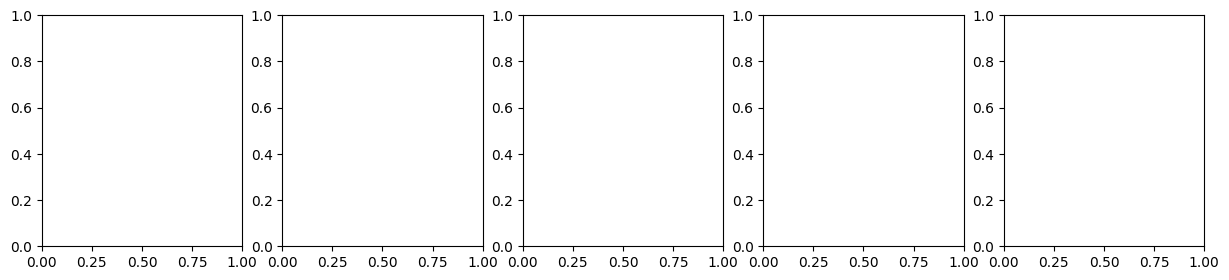

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 출력 함수
def show_images(images):
    columns = 5  # 한 줄에 출력할 이미지의 개수
    num_groups = len(images) // columns  # 그룹 개수 계산

    for i in range(num_groups + 1):
        start_index = i * columns  # 각 그룹의 시작 인덱스
        end_index = start_index + columns  # 각 그룹의 끝 인덱스

        image_paths = images[start_index:end_index]  # 그룹에 해당하는 이미지 리스트

        fig, axes = plt.subplots(1, columns, figsize=(15, 3))  # 출력할 subplot 생성

        for j, ax in enumerate(axes):
            if j < len(image_paths):  # 이미지 개수에 맞게 출력
                image_path = image_paths[j]
                image = Image.open(image_path)  # 이미지 파일을 엽니다.
                ax.imshow(image)
                ax.axis('off')  # 축을 제거합니다.

                # 이미지 사이즈 출력
                width, height = image.size
                ax.text(0, -20, f"Size: {width}x{height}", fontsize=10, color='white', backgroundcolor='black')


        plt.subplots_adjust(wspace=0.2)  # 이미지들 간의 가로 간격 조정
        plt.show()  # 그룹마다 새로운 창에 이미지 출력



# 이미지
# Fake 이미지만
image_paths = df_32by32[df_32by32['answer']==0].iloc[:100,0].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
show_images(image_paths)


In [ ]:
# 이미지 출력
# 실사 이미지만
image_paths = df_32by32[(df_32by32['label'] != df_32by32['predict']) & (df_32by32['label']==0)]['file_path'].tolist()  # 데이터프레임의 이미지 열을 리스트로 변환합니다.
print(len(image_paths))
show_images(image_paths)

# 포스팅

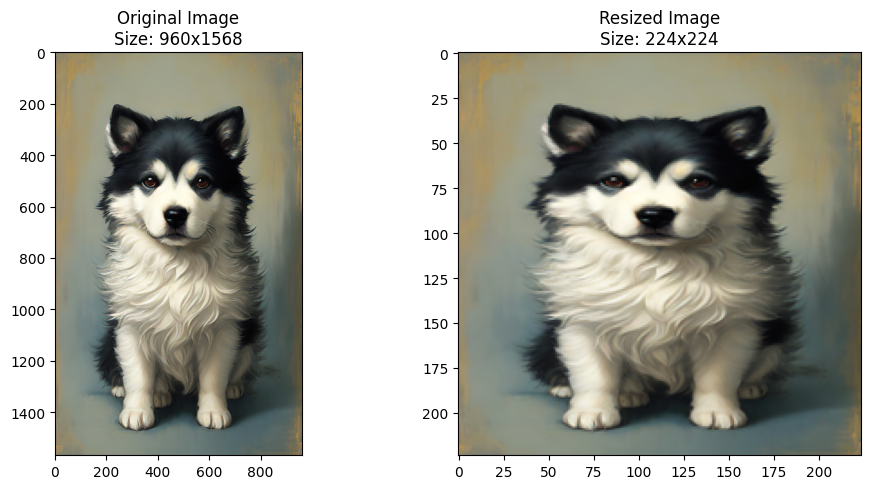

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 열기
image = Image.open("/content/p.jpg")

# 이미지 리사이즈
resized_image = image.resize((224, 224))

# 원본 이미지와 리사이즈된 이미지를 한 번에 출력하기 위해 subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 subplot에 원본 이미지 출력
axes[0].imshow(image)
axes[0].set_title("Original Image\nSize: {}x{}".format(*image.size))

# 두 번째 subplot에 리사이즈된 이미지 출력
axes[1].imshow(resized_image)
axes[1].set_title("Resized Image\nSize: {}x{}".format(*resized_image.size))

# subplot 간 간격 조정
plt.tight_layout()

# 이미지 출력
plt.show()


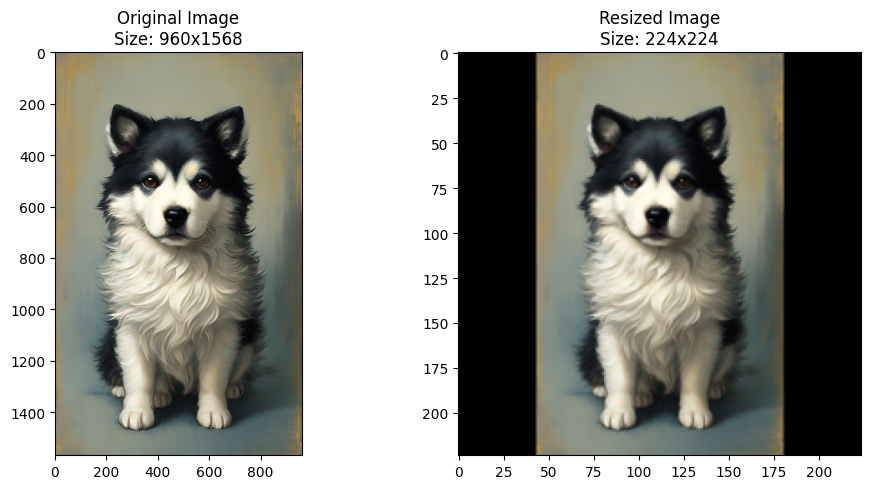

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 열기
image = Image.open("/content/p.jpg")

# 이미지 크기 구하기
width, height = image.size

# 가로세로 중 큰 값을 기준으로 정사각형 크기 계산
size = max(width, height)

# 패딩 추가
padded_image = Image.new("RGB", (size, size), (0, 0, 0))
padded_image.paste(image, ((size - width) // 2, (size - height) // 2))

# 이미지 리사이즈
resized_image = padded_image.resize((224, 224))

# 원본 이미지와 리사이즈된 이미지를 한 번에 출력하기 위해 subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 subplot에 원본 이미지 출력
axes[0].imshow(image)
axes[0].set_title("Original Image\nSize: {}x{}".format(width, height))

# 두 번째 subplot에 리사이즈된 이미지 출력
axes[1].imshow(resized_image)
axes[1].set_title("Resized Image\nSize: 224x224")

# subplot 간 간격 조정
plt.tight_layout()

# 이미지 출력
plt.show()


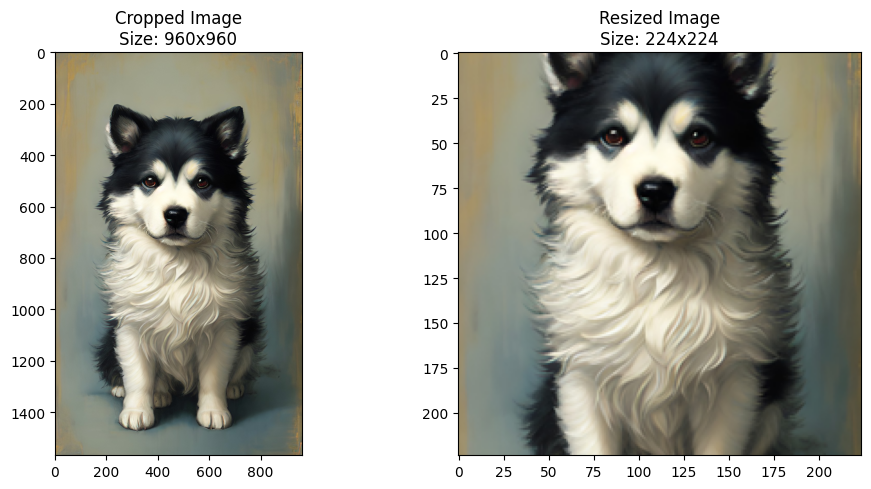

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 열기
image = Image.open("/content/p.jpg")

# 이미지 크기 구하기
width, height = image.size

# 가로세로 중 작은 값을 기준으로 정사각형 크기 계산
size = min(width, height)

# 이미지 Crop
left = (width - size) // 2
top = (height - size) // 2
right = left + size
bottom = top + size
cropped_image = image.crop((left, top, right, bottom))

# 이미지 리사이즈
resized_image = cropped_image.resize((224, 224))

# 원본 이미지와 리사이즈된 이미지를 한 번에 출력하기 위해 subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 subplot에 원본 이미지 출력
axes[0].imshow(image)
axes[0].set_title("Cropped Image\nSize: {}x{}".format(size, size))

# 두 번째 subplot에 리사이즈된 이미지 출력
axes[1].imshow(resized_image)
axes[1].set_title("Resized Image\nSize: 224x224")

# subplot 간 간격 조정
plt.tight_layout()

# 이미지 출력
plt.show()


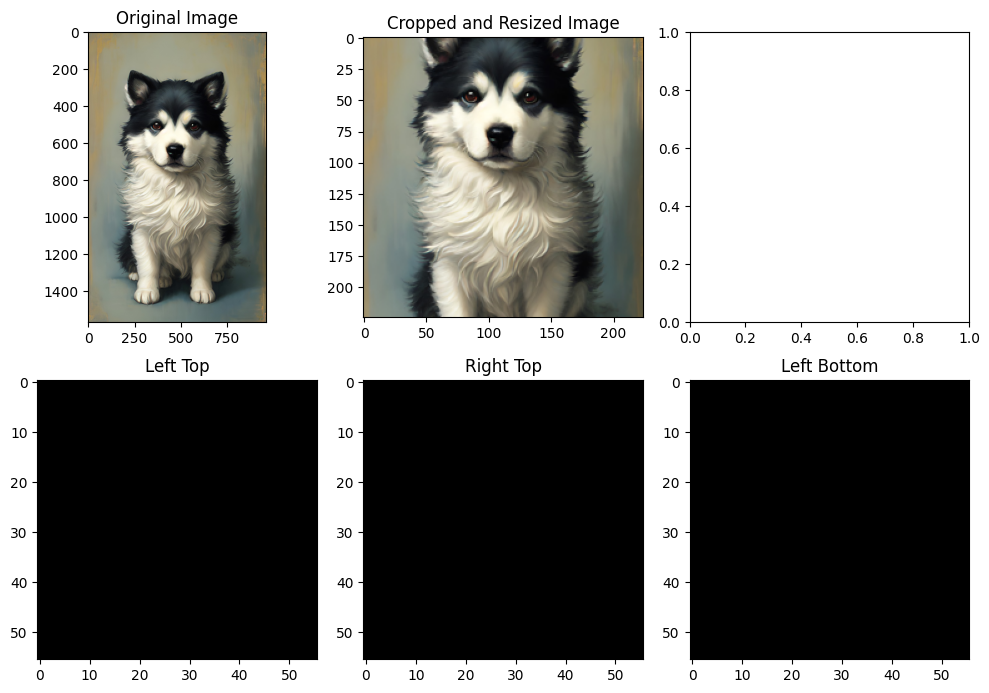

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 열기
image = Image.open("/content/p.jpg")

# 이미지 크기 구하기
width, height = image.size

# 이미지를 가로세로 비율 1:1로 Crop
size = min(width, height)
left = (width - size) // 2
top = (height - size) // 2
right = left + size
bottom = top + size
cropped_image = image.crop((left, top, right, bottom))

# Crop된 이미지를 리사이즈
resized_image = cropped_image.resize((224, 224))

# 패딩 추가
padding_size = max(width, height)
padded_image = Image.new("RGB", (padding_size, padding_size), (0, 0, 0))
padded_image.paste(resized_image, ((padding_size - 224) // 2, (padding_size - 224) // 2))

# 4분면으로 Crop
left_top = padded_image.crop((0, 0, 112, 112))
right_top = padded_image.crop((112, 0, 224, 112))
left_bottom = padded_image.crop((0, 112, 112, 224))
right_bottom = padded_image.crop((112, 112, 224, 224))

# Crop된 이미지들을 리사이즈
left_top_resized = left_top.resize((56, 56))
right_top_resized = right_top.resize((56, 56))
left_bottom_resized = left_bottom.resize((56, 56))
right_bottom_resized = right_bottom.resize((56, 56))

# 원본 이미지와 리사이즈된 이미지를 subplot으로 출력
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# 첫 번째 행, 첫 번째 열: 원본 이미지
axes[0, 0].imshow(image)
axes[0, 0].set_title("Original Image")

# 첫 번째 행, 두 번째 열: Crop 후 리사이즈된 이미지
axes[0, 1].imshow(resized_image)
axes[0, 1].set_title("Cropped and Resized Image")

# 두 번째 행, 첫 번째 열: 왼쪽 상단 Crop 후 리사이즈된 이미지
axes[1, 0].imshow(left_top_resized)
axes[1, 0].set_title("Left Top")

# 두 번째 행, 두 번째 열: 오른쪽 상단 Crop 후 리사이즈된 이미지
axes[1, 1].imshow(right_top_resized)
axes[1, 1].set_title("Right Top")

# 두 번째 행, 세 번째 열: 왼쪽 하단 Crop 후 리사이즈된 이미지
axes[1, 2].imshow(left_bottom_resized)
axes[1, 2].set_title("Left Bottom")

# subplot 간 간격 조정
plt.tight_layout()

# 이미지 출력
plt.show()

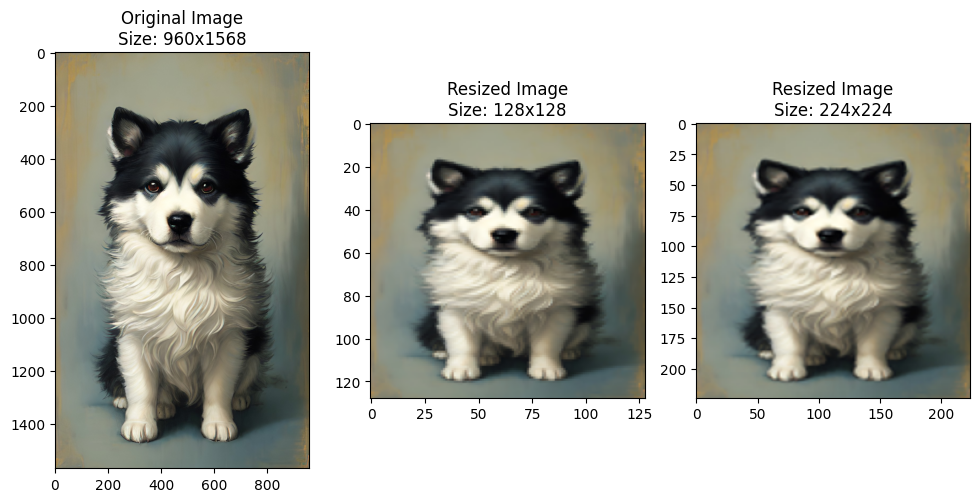

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 열기
image = Image.open("/content/p.jpg")

# 이미지 리사이즈
resized_image = image.resize((128, 128))
resized_image2 = resized_image.resize((224, 224))

# 원본 이미지와 리사이즈된 이미지를 한 번에 출력하기 위해 subplot 설정
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# 첫 번째 subplot에 원본 이미지 출력
axes[0].imshow(image)
axes[0].set_title("Original Image\nSize: {}x{}".format(*image.size))

# 두 번째 subplot에 리사이즈된 이미지 출력
axes[1].imshow(resized_image)
axes[1].set_title("Resized Image\nSize: {}x{}".format(*resized_image.size))

axes[2].imshow(resized_image2)
axes[2].set_title("Resized Image\nSize: {}x{}".format(*resized_image2.size))

# subplot 간 간격 조정
plt.tight_layout()

# 이미지 출력
plt.show()
